# MashaAllah


# Training model for Fruit Classification


# Team:


*** Abdullah Anwar K173942 ***
*** Bilal Rizwan K173915 ***
*** Bilal Zubairi K173921 ***

# This is the PART ONE of the code where we do Training and Testing

# -------------------------------------------------------

In [226]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# Check DataSet and defining constants

In [4]:
s = cv2.imread('../../DATA/fruits-360_dataset/fruits-360/T&T/Training/Apple Braeburn/136_100.jpg')

In [5]:
s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)

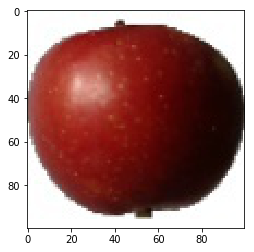

In [6]:
plt.imshow(s)

In [7]:
s.shape

(100, 100, 3)

# Image Data Generator Object creation

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.3, height_shift_range=0.3,
            horizontal_flip=True, fill_mode='nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)
 

# Building Model

In [32]:
from keras.models import Sequential

In [33]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [34]:
model = Sequential()
input_img_shape = (100,100,3)

# layer One convotutional layer
model.add( layer=Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape=input_img_shape) )
model.add( layer=Conv2D(filters=32, kernel_size=(3, 3), activation ='relu') )
model.add( layer=MaxPooling2D(pool_size=(2, 2),strides=2) )
model.add( layer=Dropout(rate=0.25) )

# layer two convotutional layer
model.add( layer=Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation = 'relu') )
model.add( layer=Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu') )
model.add( layer=MaxPooling2D(pool_size=(2, 2),strides=2) )
model.add( layer=Dropout(rate=0.25) )

# layer three flatten layer
model.add( layer=Flatten() )

# layer inter-connceted layer
model.add( layer=Dense(units=512, activation = 'relu') )
model.add( layer=Dropout(rate=0.5) )

# layer final
model.add( layer=Dense(units=120, activation = 'softmax') )

# Built Model Summary

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
__________

# compile model

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Activating Image Generator

In [37]:
train_data_folder_path = '../../DATA/fruits-360_dataset/fruits-360/T&T/Training'
test_data_folder_path = '../../DATA/fruits-360_dataset/fruits-360/T&T/Test'

number_train_samples = 60498 
number_test_samples = 20622  
epochs = 10                      # change number of cycels here
input_img_shape = (100,100,3)
num_classes = 120
batch_size = 32

In [38]:
train_img_gen = train_datagen.flow_from_directory(train_data_folder_path, target_size=input_img_shape[:2], batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 60498 images belonging to 120 classes.


In [39]:
test_img_gen = test_datagen.flow_from_directory(test_data_folder_path, target_size=input_img_shape[:2],batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 20622 images belonging to 120 classes.


In [40]:
train_img_gen.batch_size

32

In [41]:
train_img_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Dates': 35,
 'Eggplant': 36,
 'Ginger Root': 37,
 'Granadilla': 38,
 'Grape Blue': 39,
 'Grape Pink': 40,
 'Grape White': 41,
 'Grape White 2': 42,
 'Grape White 3': 43,
 'Grape White 4': 44,
 'Grapefruit Pink': 45,
 'Grapefruit White': 46,
 'Guava': 47,
 'Hazelnut

# Training Model for 10 epochs

In [30]:
import warnings

In [31]:
warnings.filterwarnings('ignore')

# fitting model

In [20]:
Results = model.fit_generator( generator=train_img_gen, steps_per_epoch =number_train_samples//batch_size, epochs = epochs, validation_data = test_img_gen, validation_steps = number_train_samples//batch_size)

Epoch 1/10
1890/1890 [==============================] - 970s 513ms/step - loss: 2.1122 - accuracy: 0.3984 - val_loss: 0.1843 - val_accuracy: 0.7097
Epoch 2/10
1890/1890 [==============================] - 960s 508ms/step - loss: 0.6897 - accuracy: 0.7685 - val_loss: 0.0098 - val_accuracy: 0.8967
Epoch 3/10
1890/1890 [==============================] - 958s 507ms/step - loss: 0.4798 - accuracy: 0.8372 - val_loss: 5.4539e-05 - val_accuracy: 0.9528
Epoch 4/10
1890/1890 [==============================] - 965s 511ms/step - loss: 0.4012 - accuracy: 0.8662 - val_loss: 7.9578e-04 - val_accuracy: 0.9465
Epoch 5/10
1890/1890 [==============================] - 963s 509ms/step - loss: 0.3361 - accuracy: 0.8876 - val_loss: 0.0093 - val_accuracy: 0.9353
Epoch 6/10
1890/1890 [==============================] - 959s 507ms/step - loss: 0.3047 - accuracy: 0.8974 - val_loss: 0.0155 - val_accuracy: 0.9472
Epoch 7/10
1890/1890 [==============================] - 969s 513ms/step - loss: 0.2793 - accuracy: 0.907

# Save Model

In [40]:
model.save('../MOdels/fruitmodel.h5')

# Evoluating performance 

In [20]:
import keras

In [21]:
keras.__version__

'2.2.4'

In [9]:
from keras.models import load_model

Using TensorFlow backend.
C:\Users\MAAU\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MAAU\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MAAU\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MAAU\Anacon

In [43]:
model = load_model('../2.Models_Trained/fruitmodel.h5', compile=False)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [253]:

#Confution Matrix and Classification Report
prededictions = model.predict_generator(test_img_gen, number_test_samples//batch_size+1)


In [254]:
prededictions_alter = np.argmax(prededictions, axis=1)
class_labels = test_img_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}
target_names = list(class_labels.values())
print('Confusion Matrix')
print(confusion_matrix(test_img_gen.classes, prededictions_alter))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_img_gen.classes, prededictions_alter, target_names=target_names))

Confusion Matrix
[[145   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0 160 ...   0   0   0]
 ...
 [  0   0   0 ... 127   0   0]
 [  0   0   0 ...   0 152   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.90      0.88      0.89       164
 Apple Crimson Snow       0.84      1.00      0.91       148
     Apple Golden 1       0.83      0.98      0.90       164
     Apple Golden 2       0.97      0.87      0.92       164
     Apple Golden 3       0.87      1.00      0.93       161
 Apple Granny Smith       1.00      1.00      1.00       164
    Apple Pink Lady       0.99      1.00      0.99       152
        Apple Red 1       1.00      0.82      0.90       164
        Apple Red 2       0.90      0.84      0.87       164
        Apple Red 3       0.72      1.00      0.84       144
Apple Red Delicious       1.00      1.00      1.00       166
 Apple Red Yellow 1       0.89      

# Checking out new pictures -------------- this is only for testing purpose dont put in actual code because this piece of code is take from another person ----------------------

In [255]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.preprocessing import image
from os import listdir
from os.path import isfile, join
import re
import matplotlib.image as mpimg


( 1 )


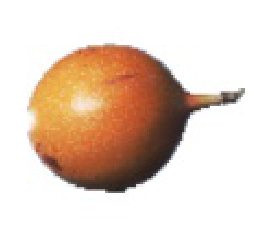

Predicted:  Granadilla
True:  Granadilla

( 2 )


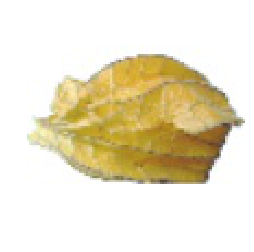

Predicted:  Physalis with Husk
True:  Physalis with Husk

( 3 )


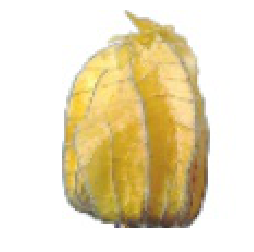

Predicted:  Physalis with Husk
True:  Physalis with Husk

( 4 )


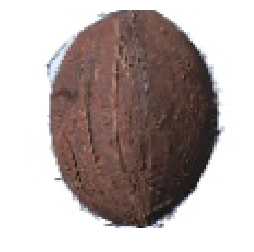

Predicted:  Cocos
True:  Cocos

( 5 )


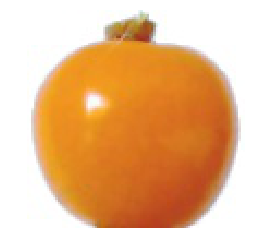

Predicted:  Physalis
True:  Physalis

( 6 )


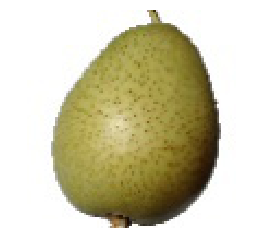

Predicted:  Pear
True:  Pear

( 7 )


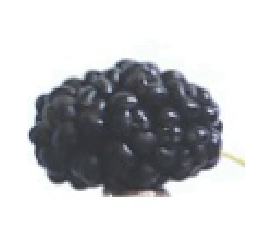

Predicted:  Mulberry
True:  Mulberry

( 8 )


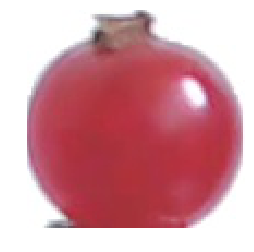

Predicted:  Redcurrant
True:  Redcurrant

( 9 )


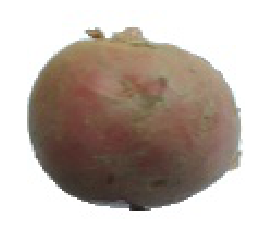

Predicted:  Potato Red
True:  Potato Red

( 10 )


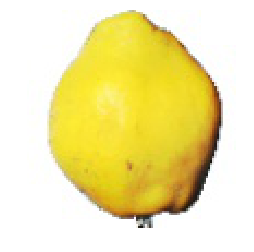

Predicted:  Quince
True:  Quince

( 11 )


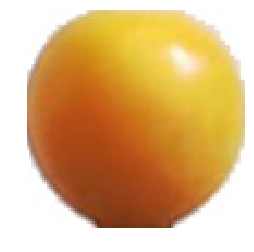

Predicted:  Cherry Wax Yellow
True:  Cherry Wax Yellow

( 12 )


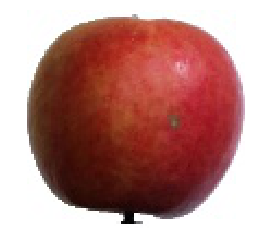

Predicted:  Apple Crimson Snow
True:  Apple Crimson Snow

( 13 )


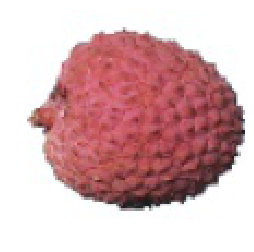

Predicted:  Lychee
True:  Lychee

( 14 )


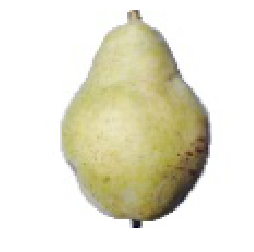

Predicted:  Pear Williams
True:  Pear Williams

( 15 )


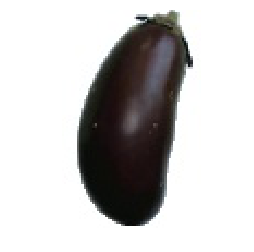

Predicted:  Eggplant
True:  Eggplant


In [259]:
def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
   # print(file_path)
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))] #
   # print(type(file_names)) 
    random_file_index = np.random.randint(0,len(file_names)) #
    image_name = file_names[random_file_index] #
    final_path = file_path + "/" + image_name #
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 100, 100

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 15):
    path = '../../DATA/fruits-360_dataset/fruits-360/T&T/Test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    img=mpimg.imread((files[i]))
    print("\n(",i+1,")")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print("Predicted: ", class_labels[predictions[i][0]])
    print("True: ", true_labels[i])

# ----------------------------------------------------end of the sector--------------------------------------------